# Incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence de la varicelle sont disponibles sur le site web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Le jeu de données complet commence en 1991 et se termine avec une semaine récente.

In [4]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json) :

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                      |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                        |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                      |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                      |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                    |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)  |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)  |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                        |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

Pour éviter une perte de données en cas de changements sur le serveur du Réseau Sentinelles, les données sont stockées en local dans le fichier syndrome-varicelle.csv. Si ce fichier n'est pas présent, les données seront automatiquement téléchargées et le fichier créé.

In [5]:
data_file = "syndrome-varicelle.csv"

import os
import urllib.request
if not os.path.exists(data_file) :
    urllib.request.urlretrieve(data_url, data_file)

In [6]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202048          7   6747     4331    9163      10           6   
1     202047          7   4999     2963    7035       8           5   
2     202046          7   3752     1963    5541       6           3   
3     202045          7   3696     2016    5376       6           3   
4     202044          7   4391     2375    6407       7           4   
5     202043          7   4376     2505    6247       7           4   
6     202042          7   4000     1979    6021       6           3   
7     202041          7   3961     2099    5823       6           3   
8     202040          7   2078      675    3481       3           1   
9     202039          7   1049      237    1861       2           1   
10    202038          7   2253      782    3724       3           1   
11    202037          7   1584      405    2763       2           0   
12    202036          7    919      100    1738       1           0   
13    202035          7    828        0    1694       1           0   
14    202034          7   2272      371    4173       3           0   
15    202033          7   1284      177    2391       2           0   
16    202032          7   2650      689    4611       4           1   
17    202031          7   1303      100    2506       2           0   
18    202030          7   1385       75    2695       2           0   
19    202029          7    841       10    1672       1           0   
20    202028          7    728        0    1515       1           0   
21    202027          7    986      149    1823       1           0   
22    202026          7    694        0    1454       1           0   
23    202025          7    228        0     597       0           0   
24    202024          7    388        0     959       1           0   
25    202023          7    558        1    1115       1           0   
26    202022          7    277        0     633       0           0   
27    202021          7    602       36    1168       1           0   
28    202020          7    824       20    1628       1           0   
29    202019          7    310        0     753       0           0   
...      ...        ...    ...      ...     ...     ...         ...   
1535  199126          7  17608    11304   23912      31          20   
1536  199125          7  16169    10700   21638      28          18   
1537  199124          7  16171    10071   22271      28          17   
1538  199123          7  11947     7671   16223      21          13   
1539  199122          7  15452     9953   20951      27          17   
1540  199121          7  14903     8975   20831      26          16   
1541  199120          7  19053    12742   25364      34          23   
1542  199119          7  16739    11246   22232      29          19   
1543  199118          7  21385    13882   28888      38          25   
1544  199117          7  13462     8877   18047      24          16   
1545  199116          7  14857    10068   19646      26          18   
1546  199115          7  13975     9781   18169      25          18   
1547  199114          7  12265     7684   16846      22          14   
1548  199113          7   9567     6041   13093      17          11   
1549  199112          7  10864     7331   14397      19          13   
1550  199111          7  15574    11184   19964      27          19   
1551  199110          7  16643    11372   21914      29          20   
1552  199109          7  13741     8780   18702      24          15   
1553  199108          7  13289     8813   17765      23          15   
1554  199107          7  12337     8077   16597      22          15   
1555  199106          7  10877     7013   14741      19          12   
1556  199105          7  10442     6544   14340      18          11   
1557  199104          7   7913     4563   11263      14           8   
1558  199103          7  15387    10484   20290      27          18   
1559  199102          7  16277  

Nous vérifions que jeu de données ne contient pas de points manquants.

In [7]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Le jeu données est complet, nous le copions donc directement dans une nouvelle variable 'data' sur laquelle nous pourrons travailler sans modifier les données brutes.

In [8]:
data = raw_data.copy()

Mais nos données utilisent une convention inhabituelle : le numéro de semaine est collé à l'année, donnant l'impression qu'il s'agit de nombre entier. C'est comme ça que Pandas les interprète.

Un deuxième problème est que Pandas ne comprend pas les numéros de semaine. Il faut lui fournir les dates de début et de fin de semaine. Nous utilisons pour cela la bibliothèque 'isoweek'.

Comme la conversion des semaines est devenu assez complexe, nous écrivons une petite fonction Python pour cela. Ensuite, nous l'appliquons à tous les points de nos donnés. Les résultats vont dans une nouvelle colonne 'period'.

In [9]:
def convert_week(year_and_week_int) :
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0),'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il reste deux modifications à faire.

Premièrement, nous définissons les périodes d'observation comme nouvel index de notre jeu de données pour ne faire une suite chonologique, plus facile à utiliser.

Deuxièmement , nous tirons les points par période dans le sens chonologique.

In [10]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et le début de la période qui suit, la différence temporelle doit être zéro, ou au moins très faible. Nous laisson une "marge d'erreur" d'une seconde.

In [13]:
periods = sorted_data.index
for p1, p2 in zip(periods[:1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Il n'y a visiblement pas de problème de cohérence des données.
Regardons ce que ça donne :

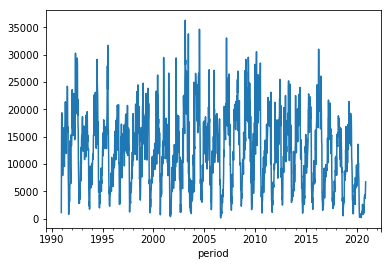

In [14]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre un creux des incidences en septembre de chaque année.

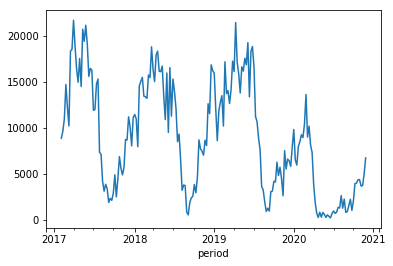

In [21]:
sorted_data['inc'][-200:].plot()

# Etude de l'incidence annuelle

Pour simplifier le décompte des incidences par années, nous définissons la période de référence entre deux minima de l'incidence, du 1er septembre de l'année **N** au 1er septembre de l'année **N + 1**.

Notre tâche est un peu compliquée par le fait que l'année ne comporte pas un nombre entier de semaines. Nous modifions donc un peu nos périodes de référence : à la place du 1er spetembre de chaque année, nous utilisons le premier jour de la semaine qui contient le 1er septembre.

Comme l'incidence de la varicelle est très faible en septembre, cette modification ne risque pas de fausser nos conclusions.

Encore un petit détail : les données commencent en décembre 1990, ce qui rend la première année incomplète. Nous commençons donc l'analyse en 1991.

In [22]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                    for y in range (1991, sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er septemebre, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines , pour nous protéfer contre des éventuelles erreurs dans notre code.

In [26]:
year = []
yearly_incidence = []

for week1, week2 in zip(first_sept_week[:-1], first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data = yearly_incidence, index = year)

Voici les incidences annuelles.

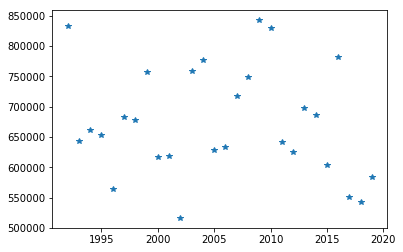

In [27]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement repérer les valeurs extrêmes.

In [28]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

L'épidémie de varicelle fut donc la plus forte depuis 1991 en 2009 et la plus faible en 2002.